In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import euclidean, pdist, squareform
import random
import operator

In [2]:
# business data
# filtered based on the state (filter can be changed to different state)
data_business = pd.read_json("yelp_dataset/yelp_academic_dataset_business.json", lines=True)
data_business = data_business[data_business['state'] == 'NC']
data_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
57,2908 Oak Lake Blvd,"{u'RestaurantsTableService': u'False', u'GoodF...",AYL_y8ahquUW0o-cvIyLbg,"Restaurants, Pizza",Charlotte,None,1,35.190366,-80.922471,Junior's Pizzeria,,28208,85,3.5,NC
59,2812 W Sugar Creek Rd,"{u'GoodForMeal': u'{'dessert': False, 'latenig...",Aws6VX-PDsZoCw9oHpBMCg,"Fast Food, Restaurants, Sandwiches, Food",Charlotte,"{u'Monday': u'7:0-21:30', u'Tuesday': u'7:0-21...",1,35.301882,-80.801484,Subway,Derita,28262,3,2.0,NC
60,"1913 J N Pease Pl, Ste 104","{u'AcceptsInsurance': u'False', u'ByAppointmen...",rmGQGPpk1XZFTkz-4IGHCw,"Health & Medical, Diagnostic Imaging, Diagnost...",Charlotte,"{u'Monday': u'10:0-20:0', u'Tuesday': u'10:0-2...",1,35.320917,-80.773400,Baby Bundle 3d/4d Ultrasound,Derita,28262,3,4.0,NC
64,1525 W Wt Harris Blvd,"{u'AcceptsInsurance': u'True', u'ByAppointment...",NzhRebtw2AIxXkVO_BrOOQ,"Health & Medical, Dentists, Cosmetic Dentists,...",Charlotte,None,1,35.312159,-80.772837,Family Dentistry at CIC,Derita,28262,4,2.0,NC
90,2523 South Blvd,None,jaKf1HVjEEsSMoFvpQdMNQ,"Pet Groomers, Pet Boarding, Pets, Veterinarian...",Charlotte,"{u'Monday': u'20:0-6:0', u'Tuesday': u'20:0-6:...",1,35.202363,-80.864662,Long Animal Hospital,South End,28203,103,3.5,NC


In [3]:
# user data
data_user = pd.read_json("yelp_dataset/yelp_academic_dataset_user.json", lines=True)
data_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,...,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18


In [4]:
# review data
data_review = pd.read_json("yelp_dataset/yelp_academic_dataset_review.json", lines=True)
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [5]:
# inner join of business and review data
joined_data = pd.merge(data_business, data_review, on="business_id", how="inner", sort=False, suffixes=('_x', '_y'))
joined_data = joined_data[['business_id','city','categories','user_id','stars_x']]
joined_data.head()

,business_id,city,categories,user_id,stars_x
0,AYL_y8ahquUW0o-cvIyLbg,Charlotte,"Restaurants, Pizza",fBdj2vz6Pwzdyb58SYdLqQ,3.5
1,AYL_y8ahquUW0o-cvIyLbg,Charlotte,"Restaurants, Pizza",YdCiiNeTnDt0vjoN0Fg4Pw,3.5
2,jaKf1HVjEEsSMoFvpQdMNQ,Charlotte,"Pet Groomers, Pet Boarding, Pets, Veterinarian...",XeN9_t7CZp8apE_9R97jPA,3.5
3,Gc8R7b3I3CTwAiWv7MjtSg,Charlotte,"Body Shops, Auto Repair, Automotive",FmGjEwS2TKLKaQ4lQH9cOQ,4.5
4,xpqdm0KY-bZHr17MqObj_Q,Monroe,"Restaurants, Seafood",v2XXWU3JucN0vLBoLFo6oQ,4.5


In [6]:
# all user ids and restaurant ids
user_id_list=joined_data.user_id.unique().tolist()
restaurant_id_list=joined_data.business_id.unique().tolist()

#utility matrix
utility = pd.pivot_table(joined_data, index='user_id', columns=['business_id'], values='stars_x', fill_value=0)
sh = pd.DataFrame(utility).shape
utility.columns = range(sh[1])
utility = utility.T
utility.columns = range(sh[0])
utility = utility.T
utility = utility.values
utility

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.]])

In [7]:
# euclidean similarity matrix
similarity_euclidean = squareform(pdist(utility, metric='euclidean'))
print(similarity_euclidean)
print(similarity_euclidean.shape)

[[0.         5.31507291 6.02079729 ... 5.31507291 5.65685425 5.65685425]
 [5.31507291 0.         5.70087713 ... 4.94974747 5.31507291 5.31507291]
 [6.02079729 5.70087713 0.         ... 5.70087713 6.02079729 6.02079729]
 ...
 [5.31507291 4.94974747 5.70087713 ... 0.         5.31507291 5.31507291]
 [5.65685425 5.31507291 6.02079729 ... 5.31507291 0.         5.65685425]
 [5.65685425 5.31507291 6.02079729 ... 5.31507291 5.65685425 0.        ]]
(401, 401)


In [8]:
def predctions(util, similarity, uid, bid, k):
    length = np.argsort(-similarity[uid])[:k+1]
    userslist = {}
    for i in length[1:]:
        userslist[i] = similarity[uid][i]
    n = []
    d = []
    for i, v in userslist.items():
        if util[i,bid] != 0:
            n.append(util[i,bid]*v)
            d.append(v)
        else:
            d.append(0)
    if(sum(d) != 0):
        return sum(n) / sum(d)
    else:
        return 0

# find the mean square value based on the testing data for the actual and predicied value
def recommendation_mse(util, similarity, k):
    testing_data = random.sample(range(similarity.shape[0]), 200)
    actual_value = []
    predicted_value = []
    for uid in testing_data:
        for bid in range(util.shape[1]):
            if util[uid][bid] != 0:
                actual_value.append(util[uid][bid])
                predicted_value.append(round(predctions(util, similarity, uid, bid, k)))
    return mean_squared_error(actual_value, predicted_value)

In [9]:
kusers = []
mses = []
for i in range(300):
    kusers.append(i+1)
    error = recommendation_mse(utility, similarity_euclidean, i+1)
    mses.append(error)
    print (error)

15.103632478632479
14.49468085106383
13.967842323651452
14.609243697478991
14.448275862068966
14.645569620253164
14.523127753303966
14.636178861788618
15.022532188841202
14.561158798283262
14.561983471074381
14.93695652173913
14.32563025210084
14.142857142857142
14.130658436213992
14.433127572016462
14.528969957081545
14.719565217391304
14.403125
14.097872340425532
14.406903765690377
14.179435483870968
14.27801724137931
14.543103448275861
14.19358407079646
14.064377682403434
14.214435146443515
14.129554655870445
14.431914893617021
13.516949152542374
13.576086956521738
13.538934426229508
13.912076271186441
13.448717948717949
13.064102564102564
13.175813008130081
13.872826086956522
12.851626016260163
13.610294117647058
13.583333333333334
13.256302521008404
13.75214592274678
13.396265560165975
13.571576763485478
13.618367346938776
12.954831932773109
12.857438016528926
13.15
13.273127753303966
13.179787234042553
13.484243697478991
13.309716599190283
13.058441558441558
12.884297520661157
13

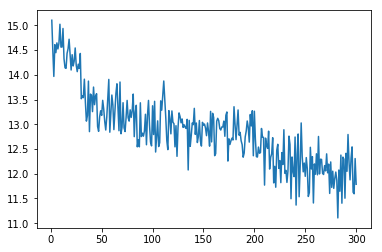

In [10]:
plt.plot(kusers, mses)

In [11]:
def recommend_restaurants(uid):
    recommended_list = []
    uid=user_id_list.index(uid)
    for bid in range(utility.shape[1]):
        p = predctions(utility, similarity_euclidean, uid, bid, k=100)
        if p != 0:    
            recommended_list.append((p,restaurant_id_list[bid]))
    recommended_list.sort(key=operator.itemgetter(0),reverse=True)
    recommended_list=recommended_list[:5]
    return recommended_list

In [12]:
recommended_list=recommend_restaurants(user_id_list[2])
print (recommended_list)
print ('\n*******************************************************************\n')
print ('Recommended restaurants for userid ' + user_id_list[2] + ' are: \n')
for r,v in recommended_list:
    rest = data_business.loc[data_business['business_id'] == v]
    print (rest.name.values)

[(5.0, u'F1brC1zP3qkVWux7C8QiXA'), (5.0, u'vDZlLRiqIjcMe_h3COKHlg'), (4.999999999999999, u'u0hZsa4CXeRDy2R4-dyJvg'), (4.999999999999999, u'aJPDsouSpAnaksj8uFHzdQ'), (4.999999999999999, u'huTkwb90PQw4HqGkbhz74Q')]

*******************************************************************

Recommended restaurants for userid XeN9_t7CZp8apE_9R97jPA are: 

[u"J Major's Bridal Boutique"]
[u"Rico's Acai"]
[u'Buffalo Wild Wings']
[u'Sake Express']
[u'Charlotte Center For Cosmetic Dentistry']
